The aptly named scan statistic is a test statistic that is based on scanning the random field $X^i$ for a pattern that may be centered anywhere in the domain.
Scan statistics are widely used in spatial detection applications; see \cite{glaz2001scan} for a thorough introduction to the topic.
The multiscale scan statistic will not only translate a given pattern over the random field but will scan for scaled versions of that pattern as well, such as rectangles with many options of side lengths or circles of varying radii.
In order to implement our scan, we begin by proposing a given pattern, which is a function $f \in \mathcal F$.
We assume that $\| f \|_{L_2} = 1$ and is supported over $[-1,1]$.
For a given field, $X^i$, we propose a scale and location parameter, $h \in [h_L, h_U]^d, t \in \prod_j [h_j,1-h_j]$ respectively, and test if the pattern $f$ centered at $t$ and scaled by $h$ is hidden within image $X^i$.
This is accomplished by convolving the field, $X^i$, with the scaled function $f_h: = f(. / h) / h$,
\begin{equation}
(f_h \star X^i)(t) = \int \frac{1}{h}f\left( \frac{\tau - t}{h} \right) {\rm d} X^i(\tau).
\end{equation}
Notice that $\|f_h\|_{L_2} = 1$ as well, so under the null hypothesis, this has mean $0$ and variance $1$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
n = 100
delta = 10
g = 40
X = np.linspace(0,n,n*delta)
f = np.sin(np.linspace(0,1,g)*(2.*np.pi))
#f = 2.* (np.arange(g) % 2) - 1
f = f / np.linalg.norm(f)

In [3]:
def Ysim(mu=3.):
    Y = np.random.randn(n*delta)
    F = np.zeros(n*delta)
    i = np.random.randint(0,n*delta-g)
    Y[i:i+g] += f*mu
    F[i:i+g] += f*mu
    return(Y,F)

In [4]:
def Nsim():
    Y = np.random.randn(n*delta)
    return(Y)

In [5]:
Y,F = Ysim()

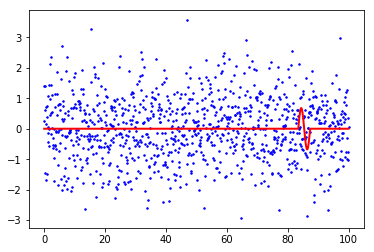

In [21]:
plt.plot(X,Y,'b.',markersize=3)
_ = plt.plot(X,F,'r',lw=2)
_ = plt.savefig('sineNoiseSig.png')

In [7]:
fhat = np.random.randn(g)
fhat = fhat / (np.sum(fhat**2.))**0.5

In [8]:
def conv(Y,fhat):
    g = len(fhat)
    return(np.array([np.sum(Y[i:i+g]*fhat) for i in range(len(Y) - g)]))

In [9]:
yc = conv(Y,fhat)
i = np.argmax(yc)
cm = np.max(yc) - (2.*np.log(n))**0.5

In [10]:
def maxi(x,fhat,gamma = 1):
    xc = conv(x,fhat)
    xe = np.exp(np.abs(xc)**gamma)
    sm = np.log(np.sum(xe))
    g = len(fhat)
    gm = [gamma * np.sum(np.sign(xc) * np.abs(xc)**(gamma - 1) * xe * x[j:-(g-j)]) / np.sum(xe) for j in range(g)]
    return(sm,np.array(gm))

In [11]:
def maxinf(x,fhat):
    xc = conv(x,fhat)
    sm = np.max(np.abs(xc))
    g = len(fhat)
    gm = [np.sum((np.abs(xc)==sm) * x[j:-(g-j)]) for j in range(g)]
    return(sm,np.array(gm))

In [12]:
sm, gm = maxinf(Y,fhat)

In [13]:
fhat = np.random.randn(g)
fhat = fhat / (np.sum(fhat**2.))**0.5

In [14]:
for t in range(200):
    Y, _ = Ysim()
    sm, gm = maxi(Y,fhat,gamma=1.)
    fhat += 10.*(t+1)**(-0.5) * gm
    fhat = fhat / np.linalg.norm(fhat)

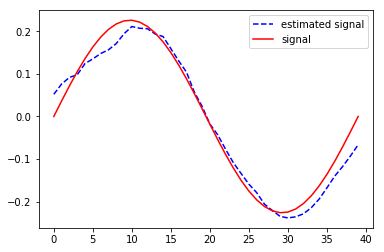

In [16]:
_ = plt.plot(fhat,'b--',label="estimated signal")
_ = plt.plot(f/np.linalg.norm(f),'r',label="signal")
plt.legend()
_ = plt.savefig('sineSig.png')

In [616]:
def sqrscan(Y):
    return(np.max(conv(Y**2 - 1, np.ones(g)/g**0.5)))

In [623]:
def learnscan(Y):
    return(np.max(np.abs(conv(Y,fhat))))

In [683]:
T = 1000
lnull = [learnscan(Nsim()) for i in range(T)]
snull = [sqrscan(Nsim()) for i in range(T)]
lalt = [learnscan(Ysim()[0]) for i in range(T)]
salt = [sqrscan(Ysim()[0]) for i in range(T)]

In [684]:
ltpr = [np.mean(lalt > st) for st in np.sort(lnull)]
stpr = [np.mean(salt > st) for st in np.sort(snull)]
fpr = 1. - np.linspace(0,1,T)

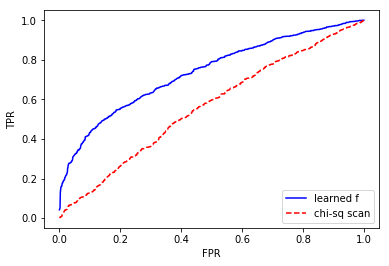

In [685]:
plt.plot(fpr,ltpr,'b-',label="learned f")
plt.plot(fpr,stpr,'r--',label="chi-sq scan")
plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('sineROC.png')

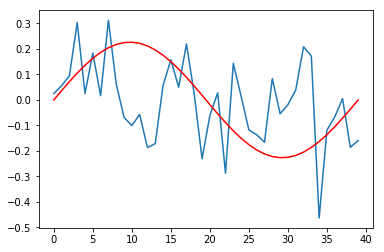

In [599]:
for t in range(100):
    Y, _ = Ysim()
    sm, gm = maxinf(Y,fhat)
    if sm < (2.*np.log(n*delta))**0.5:
        gm = np.random.randn(g)
        fhat += .2*gm
    else:
        fhat += gm
    fhat = fhat / np.linalg.norm(fhat)

_ = plt.plot(fhat)
_ = plt.plot(f/np.linalg.norm(f),'r')

In [578]:
conv(Y,fhat)

array([ -2.32128453e+00,  -1.08236081e+00,  -2.23401484e+00,
         1.25504406e+00,  -4.31335875e-01,  -1.01729434e+00,
        -1.14096080e+00,  -1.28668665e-01,  -2.28952037e+00,
        -5.79983874e-01,   1.63501127e-01,  -2.17823173e+00,
         7.61441494e-01,  -9.67914631e-01,  -3.63569441e-01,
        -6.67841359e-01,  -4.04267356e-01,   1.15654529e+00,
         1.90905344e-01,  -1.61179203e+00,  -1.93585043e+00,
         6.01738678e-01,   1.72517787e+00,  -1.08503178e+00,
        -9.80690897e-01,  -1.65020696e+00,   1.21452611e+00,
        -1.02538209e+00,   6.65042537e-01,   2.72779043e-01,
        -5.07429071e-01,   8.34916157e-03,   1.23369635e+00,
         8.16955540e-01,   4.84012236e-01,  -2.92808093e-01,
         1.09248790e+00,  -7.68204597e-03,   1.77229069e-01,
        -1.35063045e+00,   1.87002564e+00,   1.19957568e+00,
        -2.79467334e-01,  -1.19063435e+00,  -6.97203558e-01,
         2.82660127e+00,   8.00473798e-01,   1.09955728e+00,
        -2.34194553e-01,

(array([  10.,   44.,   83.,  153.,  205.,  195.,  169.,   70.,   19.,   12.]),
 array([-7.01883246, -6.44443083, -5.87002921, -5.29562758, -4.72122595,
        -4.14682433, -3.5724227 , -2.99802107, -2.42361944, -1.84921782,
        -1.27481619]),
 <a list of 10 Patch objects>)

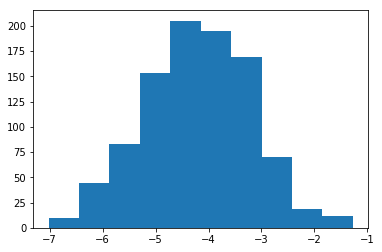

In [580]:
plt.hist(conv(Y,fhat)-(2.5*np.log(n*delta))**0.5)